In [6]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import jensenshannon

from networld_utils import *

In [89]:
data_path = '../data/Networld_N200_TMax10000/'
beta = 0.001

In [90]:
time_ab = []
tlims = np.arange(0,10000,500)[1:]
for tlim in tlims:
    nt_data = [pd.read_csv(data_path + file) 
               for file in os.listdir(data_path) if f'Beta{beta}_' in file]
    nt_data = [nt.loc[nt['t'] < tlim] for nt in nt_data]
    abdata = compute_abundance(nt_data)
    abdata['tlim'] = tlim
    time_ab.append(abdata)

time_ab = pd.concat(time_ab)
time_ab = pd.pivot_table(time_ab, values='Ab', index='tlim', columns='NRed')
time_ab = time_ab.fillna(0)

Text(0.5, 1.0, 'Beta = 0.001')

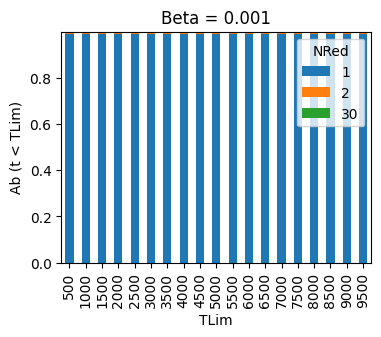

In [91]:
fig,ax = plt.subplots(figsize=(4,3))
time_ab.plot.bar(stacked=True, ax=ax)
plt.xlabel('TLim')
plt.ylabel('Ab (t < TLim)')
plt.title(f'Beta = {beta}')

Text(0.5, 1.0, 'Beta = 0.015849')

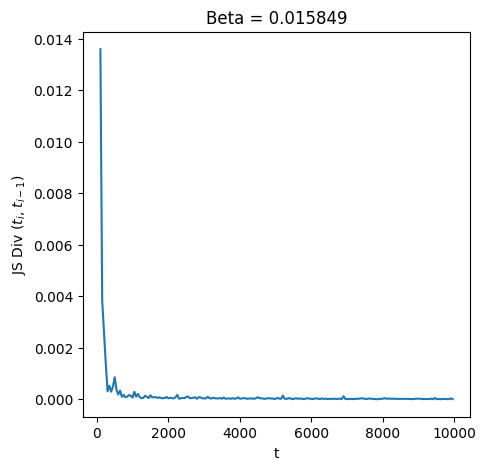

In [88]:
time_ab_shift = time_ab.shift()
js_div = jensenshannon(time_ab.T, time_ab_shift.T)

plt.figure(figsize=(5,5))
plt.plot(tlims, js_div)
plt.xlabel('t')
plt.ylabel(r'JS Div ($t_i$, $t_{i-1}$)')
plt.title(f'Beta = {beta}')

In [95]:
js_divs = []
betas = [0.001,0.0015849,0.0025119,0.0039811,0.0063096,0.01,0.015849,0.025119]
for beta in betas:
    time_ab = []
    tlims = np.arange(0,10000,50)[1:]
    for tlim in tlims:
        nt_data = [pd.read_csv(data_path + file) 
                for file in os.listdir(data_path) if f'Beta{beta}_' in file]
        nt_data = [nt.loc[nt['t'] < tlim] for nt in nt_data]
        abdata = compute_abundance(nt_data)
        abdata['tlim'] = tlim
        time_ab.append(abdata)

    time_ab = pd.concat(time_ab)
    time_ab = pd.pivot_table(time_ab, values='Ab', index='tlim', columns='NRed')
    time_ab = time_ab.fillna(0)

    time_ab_shift = time_ab.shift()
    js_div = jensenshannon(time_ab.T, time_ab_shift.T)
    js_divs.append(js_div)



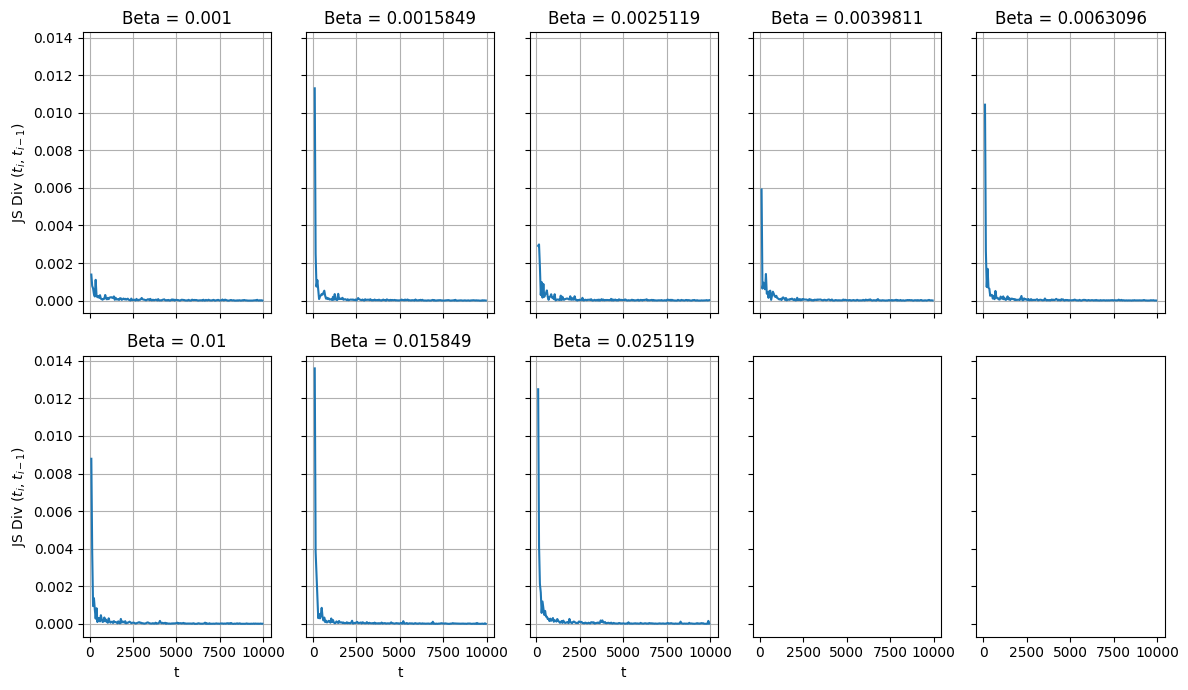

In [110]:
fig, axs = plt.subplots(2, 5, figsize=(12,7), sharex='all', sharey='all')

for i in range(2):
    for j in range(5):
        if i == 1 and j > 2:
            continue
        level = 5*i+j
        axs[i][j].plot(tlims, js_divs[level])
        if i == 1:
            axs[i][j].set_xlabel('t')
        if j == 0:
            axs[i][j].set_ylabel(r'JS Div ($t_i$, $t_{i-1}$)')
        axs[i][j].set_title(f'Beta = {betas[level]}')
        axs[i][j].set_xticks(np.arange(0,10001,2500))
        axs[i][j].grid()

plt.tight_layout()